In [1]:
# %cd ~/codeProjects/pythonProjects/Bayesian-Learning-with-Wasserstein-Barycenters

This notebook is to present some examples of the `DiscreteDistribution` class. This class is an Adapter of the `pyro.distributions.Categorical` class, where you can also choose the support that this distribution has.

The reason that this class extends the Pyro library, is for future compatibility with this library and Pytorch.

In [2]:
import torch

torch.zeros(tuple(torch.tensor((2, 3))))

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [3]:
import torch
from bwb.distributions import DiscreteDistribution


torch.manual_seed(42)

ddist = DiscreteDistribution(weights=torch.tensor([0.1, 0.3, 0.6]))
ddist.sample((10,))

tensor([0, 0, 1, 0, 2, 2, 2, 2, 0, 1])

In [4]:
from torch.distributions.categorical import Categorical

cat = Categorical(torch.tensor([2, 3, 0, 4, 0]))
cat.probs.nonzero()

tensor([[0],
        [1],
        [3]])

Additionally, you can specify the desired support for this distribution.

In [5]:
ddist = DiscreteDistribution(weights=torch.tensor([0.3, 0.7]), support=torch.tensor([4, 2]))
print(f"{ddist.sample((15,))}")
print(f"{ddist.sample_((15,))}")

tensor([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0])
tensor([4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2])


Esta clase se hizo con la intención de funcionar como clase base para la siguiente distribución: `DistributionDraw`. Esta distribución se genera a partir de una imagen, la cual se puede construir a partir de un arreglo de grayscales.

In [6]:
import numpy as np

arr_image = np.array(
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 61, 204, 238, 238, 238, 232, 196, 155, 116, 76, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 34, 241, 244, 175, 136, 136, 145, 184, 223, 254, 255, 250, 178, 85, 8,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 217, 231, 46, 0, 0, 0, 0, 0, 0, 10, 50, 129, 221,
     255, 239, 143, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 98, 255, 68, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 1, 60, 155, 248, 244, 132, 8, 0, 0, 0, 0, 0, 0, 0, 0, 216, 195, 0, 0, 102, 190, 186,
     75, 0, 0, 0, 0, 0, 45, 68, 85, 105, 170, 253, 213, 40, 0, 0, 0, 0, 0, 0, 47, 255, 94, 0,
     38, 252, 217, 254, 211, 0, 0, 0, 65, 188, 255, 255, 255, 255, 227, 71, 226, 227, 29, 0,
     0, 0, 0, 0, 128, 250, 17, 0, 67, 255, 202, 255, 255, 28, 0, 86, 255, 224, 107, 51, 40,
     94, 255, 60, 39, 236, 207, 2, 0, 0, 0, 0, 196, 190, 0, 0, 10, 222, 255, 255, 255, 33, 0,
     125, 255, 140, 23, 29, 86, 97, 255, 37, 0, 82, 255, 72, 0, 0, 0, 3, 245, 134, 0, 0, 0,
     53, 173, 214, 134, 0, 0, 68, 255, 255, 255, 255, 255, 244, 216, 4, 0, 3, 224, 177, 0, 0,
     0, 47, 255, 82, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 115, 241, 255, 255, 255, 209, 44, 0, 0, 0,
     124, 252, 31, 0, 0, 97, 255, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 71, 83, 62, 4, 0,
     0, 0, 0, 28, 255, 105, 0, 0, 112, 255, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 10, 255, 112, 0, 0, 112, 255, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 10, 255, 112, 0, 0, 105, 255, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 255, 112, 0, 0, 30, 251, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 88, 255, 70, 0, 0, 0, 171, 232, 7, 0, 4, 103, 13, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 212, 204, 1, 0, 0, 0, 57, 254, 161, 1, 24, 247,
     191, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 150, 255, 79, 0, 0, 0, 0, 0, 115, 255,
     142, 2, 80, 250, 248, 175, 90, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121, 255, 219, 1, 0, 0, 0,
     0, 0, 0, 135, 255, 199, 58, 34, 135, 222, 255, 251, 224, 195, 164, 139, 136, 136, 136,
     138, 205, 255, 255, 85, 0, 0, 0, 0, 0, 0, 0, 0, 80, 229, 255, 206, 100, 10, 52, 121,
     154, 183, 213, 237, 238, 238, 238, 244, 244, 254, 141, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8,
     95, 201, 255, 250, 206, 160, 143, 136, 136, 136, 139, 183, 241, 255, 213, 69, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 127, 178, 218, 233, 238, 238, 238, 238, 202, 144,
     61, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     0, 0, 0, 0])

In [7]:
import warnings
from bwb.distributions import DistributionDraw

with warnings.catch_warnings(record=True) as w:
    # Cause all warnings to always be triggered.
    warnings.simplefilter("always")
    # Trigger a warning.
    ddraw = DistributionDraw(torch.tensor(arr_image).to(torch.float), (28, 28))


ddraw

In [8]:
ddraw.sample((10,)).dtype

torch.int64

In [9]:
ddraw.original_support

tensor([[ 0,  0],
        [ 0,  1],
        [ 0,  2],
        ...,
        [27, 25],
        [27, 26],
        [27, 27]])

Teniendo esto, se puede samplear a partir de esta distribución.

In [10]:
torch.backends.cudnn.deterministic = True
from pathlib import Path
from icecream import ic

DS_NAME = "data"

CURR_PATH = Path().absolute()
ic(CURR_PATH)
BASE_PATH = CURR_PATH.parent.parent
ic(BASE_PATH)
DATA_PATH = BASE_PATH / "data"
ic(DATA_PATH)
WGAN_PATH = BASE_PATH / "wgan_gp"
ic(WGAN_PATH)
NETS_PATH = WGAN_PATH / "networks"
ic(NETS_PATH)
IMGS_PATH = CURR_PATH / "imgs"
# IMGS_PATH.mkdir(parents=True, exist_ok=True)
ic(IMGS_PATH)

ic| CURR_PATH: PosixPath('/home/fmunoz/codeProjects/pythonProjects/Bayesian-Learning-with-Wasserstein-Barycenters/examples/01-discrete-distribution')
ic| BASE_PATH: PosixPath('/home/fmunoz/codeProjects/pythonProjects/Bayesian-Learning-with-Wasserstein-Barycenters')
ic| DATA_PATH: PosixPath('/home/fmunoz/codeProjects/pythonProjects/Bayesian-Learning-with-Wasserstein-Barycenters/data')
ic| WGAN_PATH: PosixPath('/home/fmunoz/codeProjects/pythonProjects/Bayesian-Learning-with-Wasserstein-Barycenters/wgan_gp')
ic| NETS_PATH: PosixPath('/home/fmunoz/codeProjects/pythonProjects/Bayesian-Learning-with-Wasserstein-Barycenters/wgan_gp/networks')
ic| IMGS_PATH: PosixPath('/home/fmunoz/codeProjects/pythonProjects/Bayesian-Learning-with-Wasserstein-Barycenters/examples/01-discrete-distribution/imgs')


PosixPath('/home/fmunoz/codeProjects/pythonProjects/Bayesian-Learning-with-Wasserstein-Barycenters/examples/01-discrete-distribution/imgs')

In [14]:
from pathlib import Path
def save_fig_gen(save_figs: bool, imgs_path: Path, verbose=False):
    """Return a function with the imgs_path fixed"""
    # Making the directory in the case that this does not exist.
    if verbose and not imgs_path.exists():
        print(f"Creating directory {imgs_path}...")
        imgs_path.mkdir(parents=True, exist_ok=True)
    
    def save_fig_(fig_, name_to_save: str):
        """Save the figure with the name"""
        if save_figs:
            if verbose: print(f"Saving figures with name {name_to_save}")
            PATH_TO_SAVE = imgs_path / name_to_save
            kwargs = dict(
                bbox_inches="tight",
            )
            fig_.savefig(PATH_TO_SAVE.with_suffix(".pdf"), **kwargs)
            fig_.savefig(PATH_TO_SAVE.with_suffix(".png"), **kwargs)
            
    return save_fig_

save_fig = save_fig_gen(
    save_figs=True, 
    imgs_path=IMGS_PATH,
    verbose=True,
)


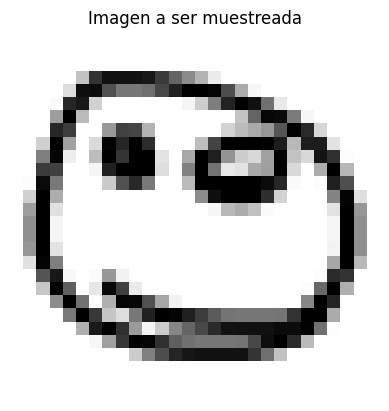

Saving figures with name face_distrib


In [15]:
import bwb.utils.plotters as plotters

fig, _ = plotters.plot_draw(ddraw, title="Imagen a ser muestreada")
save_fig(fig, "face_distrib")

Saving figures with name face_hist


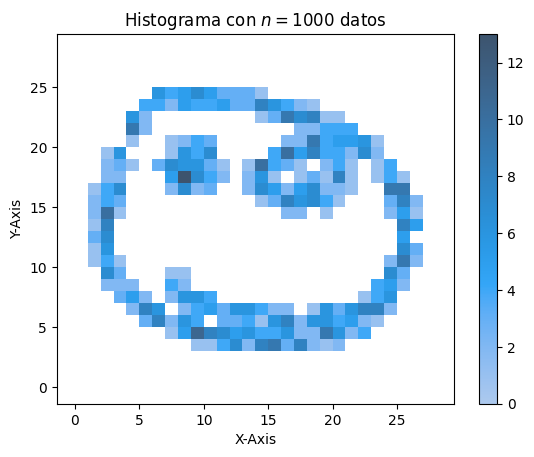

In [22]:
import matplotlib.pyplot as plt

data = ddraw.sample((1_000,))

shape = ddraw.shape
data_coords = ddraw.enumerate_support_()[data].cpu().numpy() #+ np.random.randn(len(data), 2) * 0.001

fig, _ = plotters.plot_histogram_from_points(
    data_coords,
    rotate=True,
    shape=shape,
    histplot_kwargs=dict(bins=shape[0]),
    title=r"Histograma con $n=1000$ datos",
)
save_fig(fig, "face_hist")
plt.show()